# Moduli e programma principale

Talvolta un file Python può essere utilizzato sia come programma, lanciandolo direttamente, che come modulo da importare in altri programmi. È il caso, ad esempio, del file [hangman.py](https://fad.unich.it/pluginfile.php/319831/mod_page/content/10/hangman.py?time=1701099685331) della lezione di laboratorio del 27 novembre. Questo file contiene il programma dell'impiccato, ma viene anche importato dal file [test_hangman.py](https://fad.unich.it/pluginfile.php/319831/mod_page/content/10/test_hangman.py?time=1701101210726) che ne collauda le funzioni.

È importante osservare che quando un modulo è importato, il programma pincipale contenuto al suo interno viene automaticamente eseguito, e se il programma fallisce con un errore l'importazione del modulo fallisce. Tuttavia, normalmente quando importiamo un modulo non vogliamo eseguire l'eventuale programma principale in esso contenuto: questo è sicuramente vero nel caso di test_hangman.py. Per far sì che il programma principale venga eseguito solo quando un file Python viene eseguito direttamente e non quando viene important, basta inserire il programma principale all'interno di questa istruzione if:
```python
if __name__ == "__main__":
    # qui va il programma principale
```

Quando un modulo Python viene importato, la variabile `__name__`  (che è predefinita da Python, non dobbiamo crearla noi) viene inizializzata con il nome del modulo (normalmente il nome del file). Tuttavia, se il programma è stato eseguito direttamente e non a seguito di una importazione, allora la variabile `__name__` assume il valore speciale `__main__`. Pertanto, controllando questa variabile possiamo sapere se un file è in corso di esecuzione diretta o è stato importato come modulo.

# Ancora sull'algoritmo di selection sort

Riportiamo qui sotto la funzione che implementa l'algoritmo di ordinamento per selezione, e la funzione ausiliaria *minimum_position*.

In [8]:
def minimum_position(l, start):
    """
    Restituisce la posizione dell'elemento minimo nella sottolista l[start:].
    Si assume che start sia una posizione valida per l.
    """
    minpos = start
    for i in range(start + 1, len(l)):
        if l[i] < l[minpos]:
            minpos = i
    return minpos

def selection_sort(l):
    """Ordina gli elementi di l."""
    for i in range(len(l)-1):
        m = minimum_position(l, i)
        l[i], l[m] = l[m], l[i]

Vogliamo provare il funzionamento di questo algoritmo e cerca di studiare quanto tempo richiede la sua esecuzione. Mentre per la ricerca lineare e la ricerca binaria abbiamo usato una lista di parole predefinita, per l'ordinamento preferiamo utilizzare liste di numeri generati artificialmente in maniera casuale.

In [9]:
from random import randint

def create_random_list(n):
    """
    Restituisce una lista di lunghezza `n` riempita di numeri interi casuali tra
    zero e un milione.
    """
    l = []
    # Quando una istruzione for viene usata per ripete delle istruzioni un
    # certo numero di volte e la variabile indice non è usata, è possibile
    # rimpiazzare la variabile indice con il simbolo di sottolineatura,
    # come fatto qui sotto.
    for _ in range(n):
        # Quando di scrive un numero, si possono usare i simboli di sottolineatura
        # per separare le cifre in gruppi di tre. La sottolineatura viene completamente
        # ignorata da Python, ma rende il numero più leggibile a un essere umano.
        l.append(randint(0, 1_000_000))
    return l

In [10]:
create_random_list(10)

[262309, 848062, 583484, 23601, 356783, 692346, 385810, 386928, 677911, 176078]

Vediamo quanto ci impiega *selection_sort* a ordinare una lista di 4000 elementi.

In [14]:
l = create_random_list(4000)

In [15]:
%%timeit
selection_sort(l)

213 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Il tempo di esecuzione di 213 ms è molto grande se confrontato con l'algoritmo di ricerca lineare (per non parlare di quella binaria). Nella lezione precedente, abbiamo visto che, sullo stesso computer, la ricerca lineare impiegava circa 13 ms nel caso peggiore a cercare un elemento in una lista enormemente più grande (400.000 elementi invece di 4000).

Proviamo adesso ad ordinare liste di lunghezza diversa, per vedere come il tempo di esecuzione dipende dalla lunghezza della lista.

In [17]:
# importiamo la funzione time dal modulo time
from time import time

times = []
for i in range(1000, 15001, 1000):
    l = create_random_list(i)
    # La funzione time restituisce il numero di secondi trascorsi dal 1° gennaio 1970.
    start_time = time()
    selection_sort(l)
    end_time = time()
    # La differenza tra end_time e start_time è la quantitià di tempo, in secondi, che è
    # stata impiegata dalla funzione selection_sort.
    times.append(end_time - start_time)
    print(f"Size {i} Time: {end_time - start_time:10.3f} secondi")

Size 1000 Time:      0.014 secondi
Size 2000 Time:      0.057 secondi
Size 3000 Time:      0.118 secondi
Size 4000 Time:      0.217 secondi
Size 5000 Time:      0.334 secondi
Size 6000 Time:      0.489 secondi
Size 7000 Time:      0.650 secondi
Size 8000 Time:      0.861 secondi
Size 9000 Time:      1.087 secondi
Size 10000 Time:      1.339 secondi
Size 11000 Time:      1.618 secondi
Size 12000 Time:      1.938 secondi
Size 13000 Time:      2.281 secondi
Size 14000 Time:      2.675 secondi
Size 15000 Time:      3.023 secondi


Si nota che quando la lunghezza della lista raddopia, il tempo di esecuzione aumenta di circa 4 volte. Ad esempio, per ordinare una lista di 5000 elementi ci sono voluti 0.334 secondi, mentre per ordinarne una di 10.000 ne sono stati necessari 1.339, e 1.339 / 0.334 è circa 4. Possiamo visualizzare l'andamento del tempo di esecuzione in funzione della lunghezza della lista col seguente codice (che non fa parte del programma del corso):

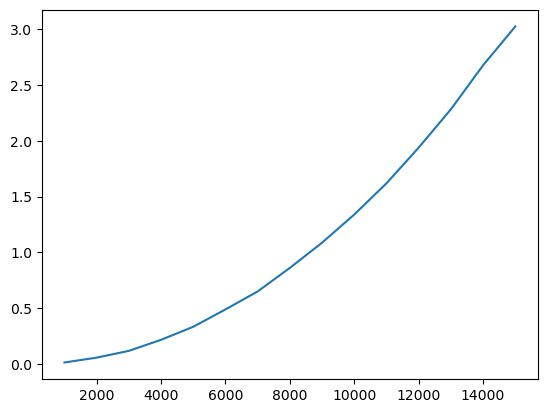

In [20]:
from matplotlib import pyplot as plt
plt.plot(range(1000,15001,1000),times)

## Studio teorico

Per uno studio teorico di come evolve il tempo di esecuzione dell'ordinamento per selezione al variare della lunghezza della lista in input, consultare la [lavagna della lezione del 28 novembre](https://fad.unich.it/mod/resource/view.php?id=27842) o la sezione 12.3 del libro di testo.

# Tabelle e matrici

Supponiamo di voler memorizzare una *tabella* come
<pre>
2   3   4
1   0  -3
</pre>
in qualche modo dentro Python, e di voler fare la somma di tutti questi elementi. Useremo il termine *matrice* come sinonimo di *tabella*.

## Possibili approcci

Abbiamo varie possibilità:

**1) usiamo una variabile diversa per ogni elemento della tabella**

Questa soluzione è pessima, va bene solo se sappiamo a priori quanti elementi ha la tabella, ma se la tabella va letta da un file su memoria di massa o da Internet, e può avere dimensione variabile, non è assoluamente possibile seguire questo approccio. Ad ogni modo, il codice che mette tutti i dati della tabella di sopra nelle variabili opportune e le somma sarebbe il seguente:
```python
a = 2
b = 3
c = 4
d = 1
e = 0
f = -3
a * b * c * d * e * f
```

**2) usare una variabile diversa per ogni riga: ogni variabile è una lista degli elementi di quella riga**

Un po' meglio di prima, ma non risolve veramente il problema, perché dobbiamo sapere a priori quante sono le righe della tabella (mentre siamo flessibili sulle colonne). L'esempio di sopra diventa:
```python
l1 = [2, 3, 4]
l2 = [1, 0, -3]

def sum_list(l):
    sum = 0
    for v in l:
        sum += v
    return sum

sum_list(l1) + sum_list(l2)
```

Notare che il codice per eseguire il prodotto si è di molto complicato: abbiamo definito una funzione ausiliaria `sum_list` che esegue la somma di tutti gli elementi di una lista, e la richiamiamo per fare la somma degli elementi in `l1` ed in `l2`. Di contro, questa soluzione è indipendente dal numero di colonne: se le liste `l1` ed `l2` hanno 100 elementi invece di 3, il codice della somma funziona correttamente. Se invece aumenta il numero di righe, il codice della somma va modificato per prevedere la riga in più che è stata inserita.

**3) usare una unica lista in cui inserire tutti gli elementi della tabella**

Questa soluzione non è male, ed è indipendente sia dal numero di righe che dal numero di colonne della tabella.
```python
l = [ 2, 3, 4, 1, 0, -3 ]

def sum_list(l):
    sum = 0
    for v in l:
        sum += v
    return sum

sum_list(l)
```

Il problema di questa soluzione è che è un po' scomoda per il programmatore. Infatti non è immediato capire come accedere ad un elemento che sta in una certa riga e colonna: bisogna fare dei calcoli per determinare dove sta questo elemento. I calcoli in realtà non sono particolarmente difficili: l'elemento in riga `i` colonna `j` sta nella posizione `i * num_colonne + j` della lista `l`. Ad ogni modo, normalmente si preferisce adottare la soluzione che vedremo qui sotto.

**4) utilizzare una unica lista di liste: gli elementi della lista sono le righe della tabella, ogni riga rappresentata essa stessa con una lista di numeri**

L'idea è fondamentalmente partire dalla soluzione 2, ma impacchettare tutte le liste che contengono le righe della tabella in una unica lista di liste.
```python
l1 = [2, 3, 4]
l2 = [1, 0, -3]
l = [l1, l2]
```
o anche, più semplicemente
```python
l = [ [2,3,4], [1,0,-3]]
```
Per il programma che fa il prodotto dei numeri della tabella vediamo qui sotto.


## Esperimenti

In [1]:
# Crea una lista formata da due elementi. Entrambi gli elementi sono a loro volta liste di numeri.
l = [ [2, 3, 4], [1, 0, -3] ]
l

[[2, 3, 4], [1, 0, -3]]

Gli elementi della lista `l` corrispondono alle righe della tabella.

In [2]:
# Il primo elemento è la lista [2, 3, 4], ovvero la prima riga della tabella
l[0]

[2, 3, 4]

In [3]:
# Il secondo elemento è la lista [2, 3, 4], ovvero la prima riga della tabella
l[1]

[1, 0, -3]

Per accedere ad un singolo elemento della tabella bisogna prima selezionare la riga desiderata con un primo utilizzo dell'operatore di accesso alle liste (le parentesi quadre []), ed all'interno della riga selezionare la colonna desiderata con un secondo utilizzo dell'operatore di accesso alle liste. Ad esempio `l[0][1]` estrae la prima riga (perché `l[0] = [2, 3, 4]` è il primo elemento di `l`, quindi la prima riga) e poi su di esso applica l'operazione `[1]` che restituisce il secondo elemento di `[2, 3, 4]` ovvero il `3`. In sostanza, `l[0][1]` accede all'elemento di `l` in riga `0` e colonna `1` (come nel caso delle liste semplici, numero di riga e colonna iniziano da 0).

In [4]:
l[0][1]

3

Supponiamo ora di voler scrivere la funzione `somma_tabella` che somma tutti gli elementi di una tabella rappresentata utilizzando questa convenzione delle liste di liste. Un primo tentativo è il seguente, in cui passiamo esplicitamente alla funzione il numero di righe e colonne della tabella (vedremo poi che non sarà necessari).

In [5]:
def somma_tabella(l, num_righe, num_colonne):
    """
    Se l è una tabella con numero di righe e colonne specificato nei
    parametri, restituisce la somma di tutti i numeri in essa presenti.
    """
    somma = 0
    # il primo for scorre tutte le righe
    for i in range(num_righe):
        # il secondo for scorre tutte le colonne
        for j in range(num_colonne):
            print("riga:", i, "colonna:", j)
            somma += l[i][j]
    return somma

L'istruzione `print` dentro il codice è stata inserita per far vedere in che ordine vengono esaminate le celle della tabella, ed ovviamente andrebbe rimossa quando si intende utilizzare veramente la funzione.

In [7]:
somma_tabella(l, 2, 3)

riga: 0 colonna: 0
riga: 0 colonna: 1
riga: 0 colonna: 2
riga: 1 colonna: 0
riga: 1 colonna: 1
riga: 1 colonna: 2


7

Se si sbalia ad indicare il numero di righe o di colonne, `somma_tabella` può sommare solo una porzione della tabella, o dare errore qualora tenti di accedere a righe e colonne inesistenti.

In [8]:
# somma solo le prime due colonne della tabella e ignora la terza
somma_tabella(l, 2, 2)

riga: 0 colonna: 0
riga: 0 colonna: 1
riga: 1 colonna: 0
riga: 1 colonna: 1


6

In [9]:
# genera errore perché non esiste la terza riga
somma_tabella(l, 3, 3)

riga: 0 colonna: 0
riga: 0 colonna: 1
riga: 0 colonna: 2
riga: 1 colonna: 0
riga: 1 colonna: 1
riga: 1 colonna: 2
riga: 2 colonna: 0


IndexError: list index out of range

## Rappresentazioni per righe o per colonne

In tutti gli esempi visti fin'ora, abbiamo deciso di rappresentare le tabelle *per riga*: gli elementi di una riga stavano sempre insieme tra di loro. Ma sarebbe altrettanto ragionevole memorizzare la tabella *per colonne*. Riconsideriamo quindi la tabella dell'esempio di sopra, e vediamo come sarebbe utilizzare la rappresentazione per colonne.
<pre>
2   3   4
1   0  -3
</pre>

**1) una variaìbile per ogni elemento**

Non cambia nulla, questa rappresentazione non si può definire né per righe né per colonne

**2) una variabile per ogni riga**

Diventa **una variabile per ogni colonna**. Invece di
```python
l1 = [2, 3, 4]
l2 = [1, 0, -3]
```
abbiamo
```python
c1 = [2, 1]
c2 = [3, 0]
c3 = [4, -3]
```

**3) una unica lista per tutti gli elementi**

Cambia l'ordine degli elementi, non più una riga dopo l'altra ma una colonna dopo l'altra. Invece di
```python
l = [2, 3, 4, 1, 0, -3]
```
abbiamo
```python
l = [2, 1, 3, 0, 4, -3]
```

**4) lista di liste**

Gli elementi della lista principale contengono le colonne della tabella. Invece di:
```python
l = [ [2,3,4], [1,0,-3] ]
```
abbiamo
```python
l = [ [2, 1], [3, 0], [4, -3] ]
```

Notare che l'interprete Python non sa niente di come decidete di memorizzare voi le tabelle: per lui si tratta solo di liste, cosa metterci dentro è compito del programmatore. Se scegliete di passare da una memorizzazione per righe ad una per colonne, dovrete sicuramente modificare buona parte del programma. Ad esempio, se utilizziamo il metodo 4 della lista di liste per memorizzare una tabella nella lista `l` adottando la appresentazione per righe e  volete accedere all'elemento nella riga 0 colonna 1, l'espressione corretta è `l[0][1]`, ma se usate la rappresentazione per colonne dovete invece scrivere `l[1][0]`.

In [10]:
# rappresenta la solita tabella per righe ed estrae l'elemento nella riga 0 e colonna 1
l_per_righe = [ [2, 3, 4], [1, 0, -3]]
l[0][1]

3

In [11]:
# rappresenta la solita tabella per colonne ed estrae l'elemento nella riga 0 e colonna 1
l_per_colonne= [ [2,1], [3,0], [4,3] ]
l_per_colonne[1][0]

3